In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Table into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [17]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [19]:
# We can view all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [23]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [24]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
['hawaii']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp = session.query(Measurement.prcp).all()
within_year = dt.date.today() - dt.timedelta(days=365)

In [71]:
measurement_results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.prcp.desc()).all()

In [63]:
date = [result[1] for result in measurement_results[:10]]
prcp = [int(result[2]) for result in measurement_results[:10]]


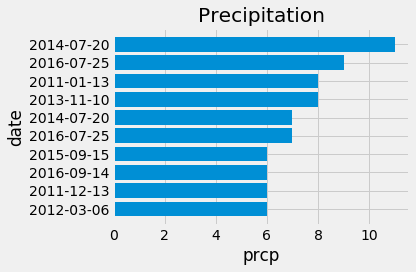

In [64]:
fig, ax = plt.subplots()
ypos = range(1, len(prcp)+1)
ax.barh(ypos, prcp[::-1])
ax.set_xlabel("prcp")
ax.set_ylabel("date")
ax.set_yticks(ypos)
ax.set_yticklabels(date[::-1])
ax.set_title("Precipitation")
fig.tight_layout()
plt.show()

In [69]:
# Calculate the date 1 year ago from the last data point in the database
last_point = session.query(Measurement.date).order_by(Measurement.date).first()
last_point

('2010-01-01')

In [70]:
last_year = dt.date(2010,1,1) - dt.timedelta(days=365)
last_year

datetime.date(2009, 1, 1)

In [73]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_dates = pd.DataFrame(measurement_results, columns=['date', 'prcp'])
prcp_dates

,date,prcp
0,2014-07-20,11.53
1,2016-07-25,9.64
2,2011-01-13,8.81
3,2013-11-10,8.06
4,2014-07-20,7.97
...,...,...
19545,2017-08-06,NaN
19546,2017-08-11,NaN
19547,2017-08-13,NaN
19548,2017-08-18,NaN


In [75]:
# Sort the dataframe by date
prcp_dates.set_index(prcp_dates['date'], inplace = True)
prcp_dates

,date,prcp
date,,
2014-07-20,2014-07-20,11.53
2016-07-25,2016-07-25,9.64
2011-01-13,2011-01-13,8.81
2013-11-10,2013-11-10,8.06
2014-07-20,2014-07-20,7.97
...,...,...
2017-08-06,2017-08-06,NaN
2017-08-11,2017-08-11,NaN
2017-08-13,2017-08-13,NaN


In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data
